Copia versión 107 disminuyendo el dropout de 0.7 a 0.6

In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd

%matplotlib inline

Using TensorFlow backend.


# Carga de datos

In [2]:
df = pd.read_excel("./CAPRI-XRAYS/Labels_CAPRI_03-04-19.xlsx")

In [3]:
print(df.shape)
df[:5]

(1000, 5)


,NEW filename,ISRAEL,Final_label,Final_label_code,Final_label_explanation
0,Picture (1).jpg,1.0,1,consolidation,Alveolar
1,Picture (2).jpg,1.0,1,consolidation,Alveolar
2,Picture (3).jpg,1.0,1,consolidation,Alveolar
3,Picture (4).jpg,3.0,0,non_consolidation,no_pneumonia
4,Picture (5).jpg,1.0,1,consolidation,Alveolar


In [4]:
file_names       = df["NEW filename"].values
final_label      = df["Final_label"].values
final_label_code = df["Final_label_code"].values

print(len(file_names), len(final_label), len(final_label_code))

file_names[:10]

1000 1000 1000


array(['Picture (1).jpg', 'Picture (2).jpg', 'Picture (3).jpg',
       'Picture (4).jpg', 'Picture (5).jpg', 'Picture (6).jpg',
       'Picture (7).jpg', 'Picture (8).jpg', 'Picture (9).JPG',
       'Picture (10).jpg'], dtype=object)

In [5]:
# Chequeo si este otro excel es igual (al menos la columna "NEW filename") que el anterior
df2 = pd.read_excel("./CAPRI-XRAYS/Picture (500)(1)/For Ron 1000 New filename.xlsx")
aux = df2["NEW filename"].values

if (file_names != aux).sum() == 0:
    print("Iguales")
else:
    print("Diferentes")

Iguales


In [6]:
from PIL import Image

def my_load_img(f):
    img = Image.open(f)
    fp = img.fp
    img.load()
    fp.closed
    return img

In [7]:
path_root1 = "./CAPRI-XRAYS/Picture (500)(1)/"
imagenes1 = [my_load_img(os.path.join(path_root1, x)) for x in file_names[:500]]

path_root2 = "./CAPRI-XRAYS/Picture (1000)(1)/"
imagenes2 = [my_load_img(os.path.join(path_root2, x)) for x in file_names[500:]]

imagenes = imagenes1 + imagenes2

In [8]:
len(imagenes)

1000

# Chequeos en los datos

In [9]:
print(np.unique(final_label))
print(np.unique(final_label_code))

[ 0  1 99]
['consolidation' 'non_consolidation' 'remove']


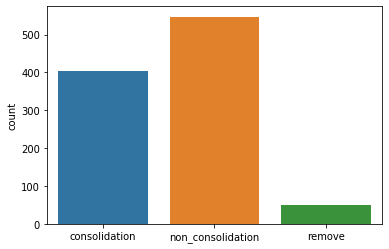

In [10]:
sns.countplot(final_label_code);

In [11]:
flags = (final_label_code != "remove")

imagenes         = [x for x,flag in zip(imagenes,flags) if flag]
file_names       = file_names[flags]
final_label      = final_label[flags]
final_label_code = final_label_code[flags]

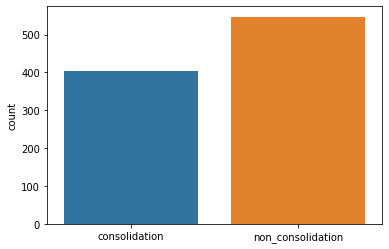

In [12]:
sns.countplot(final_label_code);

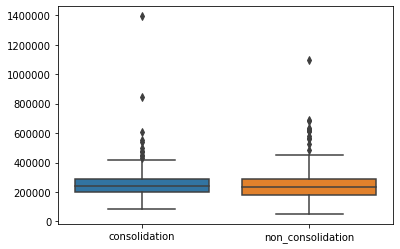

In [13]:
npixels = []
for im in imagenes:
    npixels.append(np.prod(im.size))

sns.boxplot(x=final_label_code, y=npixels);

#### Chequeo si, después de quitar las imágenes con etiqueta "remove", la variable "final_label" es siempre 1 si la etiqueta es "consolidation", y cero en caso contrario. Efectivamente, así es:

In [14]:
sum(final_label != 1*(final_label_code == "consolidation"))

0

In [15]:
y = final_label

### ¿Son realmente grises?

In [16]:
a = imagenes[1]
np.array(a)[0,0,:]

array([23, 29, 25], dtype=uint8)

In [17]:
for i,im in enumerate(imagenes):
    aux = np.abs(np.diff(np.array(imagenes[1]), axis=2)).sum(axis=2)
print(aux.shape)
print(aux.max())

(497, 586)
510


In [18]:
# chequeo que todas sean grises

def chequea_grises():
    errores = 0
    for i,(im,n) in enumerate(zip(imagenes,file_names)):
        aux1 = np.array(im)
        print(aux1.shape)
        if len(aux1)==3:
            a = aux1[:,:,0]
            b = aux1[:,:,1]
            c = aux1[:,:,2]

            aux = 0.5*np.abs((a-b)).mean() + 0.5*np.abs(b-c).mean()
            if aux != 0:
                errores = errores + 1
                print("media(abs(diferencia)) =", aux, "en imagen", i, "("+n+")")
        #        print("ERROR !!!!!")

    print(errores)


chequea_grises()

(380, 484, 3)
(497, 586, 3)
(382, 529, 3)
(501, 693, 3)
(525, 634, 3)
(530, 620, 3)
(406, 486, 3)
(337, 445, 3)
(1236, 1128)
(322, 351, 3)
(488, 592, 3)
(486, 486, 3)
(604, 688, 3)
(513, 637, 3)
(529, 639, 3)
(530, 626, 3)
(286, 362, 3)
(376, 457, 3)
(543, 636, 3)
(547, 632, 3)
(476, 576, 3)
(497, 589, 3)
(442, 624, 3)
(403, 447, 3)
(494, 557, 3)
(496, 601, 3)
(507, 565, 3)
(518, 540, 3)
(537, 626, 3)
(584, 568, 3)
(469, 645, 3)
(477, 599, 3)
(935, 1172, 3)
(540, 614, 3)
(539, 656, 3)
(433, 559, 3)
(284, 350, 3)
(389, 504, 3)
(487, 572, 3)
(460, 535, 3)
(439, 666, 3)
(460, 544, 3)
(465, 701, 3)
(475, 645, 3)
(493, 565, 3)
(508, 542, 3)
(543, 614, 3)
(507, 607, 3)
(419, 521, 3)
(578, 693, 3)
(564, 786, 3)
(464, 545, 3)
(490, 600, 3)
(439, 522, 3)
(434, 574, 3)
(402, 546, 3)
(614, 764, 3)
(468, 589, 3)
(453, 537, 3)
(483, 552, 3)
(398, 537, 3)
(373, 512, 3)
(408, 555, 3)
(263, 309, 3)
(427, 563, 3)
(435, 580, 3)
(476, 551, 3)
(541, 828, 3)
(419, 569, 3)
(416, 593, 3)
(451, 572, 3)
(543, 

## Paso a grises:

In [19]:
imagenes_gris = []
for im in imagenes:
    imagenes_gris.append(im.convert("L"))

In [20]:
chequea_grises()

(380, 484, 3)
(497, 586, 3)
(382, 529, 3)
(501, 693, 3)
(525, 634, 3)
(530, 620, 3)
(406, 486, 3)
(337, 445, 3)
(1236, 1128)
(322, 351, 3)
(488, 592, 3)
(486, 486, 3)
(604, 688, 3)
(513, 637, 3)
(529, 639, 3)
(530, 626, 3)
(286, 362, 3)
(376, 457, 3)
(543, 636, 3)
(547, 632, 3)
(476, 576, 3)
(497, 589, 3)
(442, 624, 3)
(403, 447, 3)
(494, 557, 3)
(496, 601, 3)
(507, 565, 3)
(518, 540, 3)
(537, 626, 3)
(584, 568, 3)
(469, 645, 3)
(477, 599, 3)
(935, 1172, 3)
(540, 614, 3)
(539, 656, 3)
(433, 559, 3)
(284, 350, 3)
(389, 504, 3)
(487, 572, 3)
(460, 535, 3)
(439, 666, 3)
(460, 544, 3)
(465, 701, 3)
(475, 645, 3)
(493, 565, 3)
(508, 542, 3)
(543, 614, 3)
(507, 607, 3)
(419, 521, 3)
(578, 693, 3)
(564, 786, 3)
(464, 545, 3)
(490, 600, 3)
(439, 522, 3)
(434, 574, 3)
(402, 546, 3)
(614, 764, 3)
(468, 589, 3)
(453, 537, 3)
(483, 552, 3)
(398, 537, 3)
(373, 512, 3)
(408, 555, 3)
(263, 309, 3)
(427, 563, 3)
(435, 580, 3)
(476, 551, 3)
(541, 828, 3)
(419, 569, 3)
(416, 593, 3)
(451, 572, 3)
(543, 

# Separación training/test

In [21]:
from sklearn.model_selection import train_test_split

imagenes_tr, imagenes_te, y_tr, y_te = train_test_split(imagenes_gris, y, test_size=0.3,
                                                        random_state=1, stratify=y)

In [23]:
np.array(imagenes_tr[0]).shape

(330, 440)

In [24]:
np.array(imagenes_tr[0]).max()

224

# Modelos básicos

## Dummy

In [25]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='prior')
clf.fit(X=imagenes_tr, y=y_tr)
print('Score del clasificador Dummy en test:', clf.score(X=imagenes_te,y=y_te))
# Nota: DummyClassifier en realidad no usa X

Score del clasificador Dummy en test: 0.5754385964912281


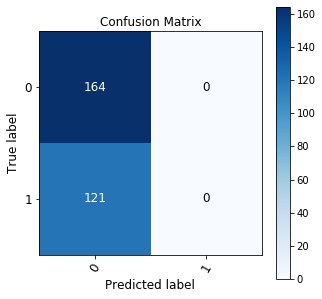

In [26]:
from scikitplot.metrics import plot_confusion_matrix # pip install scikit-plot
plot_confusion_matrix(y_te, clf.predict(imagenes_te),
                      x_tick_rotation=60, figsize=(5,5),
                      text_fontsize='large');

## Regresión Logística

### Primero "aplano" las imágenes:

In [27]:
new_size = (100,100)

imagenes_tr_resized = np.array([np.array(im.resize(new_size)) for im in imagenes_tr]) / 255
imagenes_te_resized = np.array([np.array(im.resize(new_size)) for im in imagenes_te]) / 255

imagenes_tr_resized.shape, imagenes_te_resized.shape

((665, 100, 100), (285, 100, 100))

In [28]:
imagenes_tr_flat = imagenes_tr_resized.reshape(len(imagenes_tr_resized), -1)
imagenes_te_flat = imagenes_te_resized.reshape(len(imagenes_te_resized), -1)

imagenes_tr_flat.shape, imagenes_te_flat.shape

((665, 10000), (285, 10000))

In [29]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X=imagenes_tr_flat, y=y_tr)
print('Score de la regresión logística en test:', clf.score(X=imagenes_te_flat,y=y_te))

/home/isua/anaconda3/envs/CAPRI/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score de la regresión logística en test: 0.5894736842105263


In [30]:
y_te_pred = clf.predict(imagenes_te_flat)

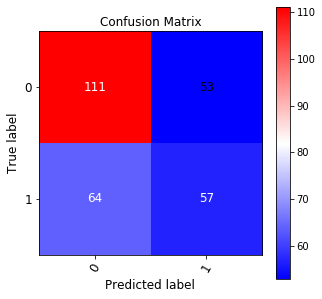

In [31]:
plot_confusion_matrix(y_te, y_te_pred, cmap="bwr",
                      x_tick_rotation=60, figsize=(5,5),
                      text_fontsize='large');

In [32]:
from sklearn.metrics import classification_report, roc_curve, auc

def report(y_num, y_pred, y_prob_pred):
    print('')
    print(classification_report(y_num, y_pred))

    fpr, tpr, thresholds = roc_curve(y_num, y_prob_pred)
    fig, ax1 = plt.subplots(1,1)
    ax1.plot(fpr, tpr, 'r-.', label = 'Simple model (%2.2f)' % auc(fpr, tpr))
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.plot(fpr, fpr, 'b-', label = 'Random Guess')
    ax1.legend();

In [33]:
clf.classes_

array([0, 1])


              precision    recall  f1-score   support

           0       0.63      0.68      0.65       164
           1       0.52      0.47      0.49       121

    accuracy                           0.59       285
   macro avg       0.58      0.57      0.57       285
weighted avg       0.58      0.59      0.59       285



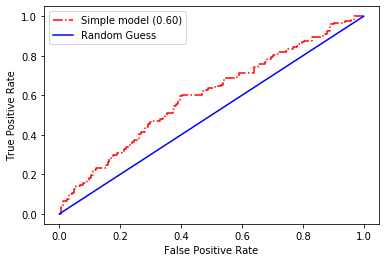

In [34]:
report(y_te, y_te_pred,
            clf.predict_proba(imagenes_te_flat)[:,1])

# CNN

In [35]:
from keras.models import Sequential, load_model, Model
from keras.layers import (Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation,
                          BatchNormalization)
from keras import backend as K
from keras import regularizers
from keras.losses import binary_crossentropy
from keras import optimizers
from keras.callbacks import ModelCheckpoint

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [36]:
new_size = (150,150)

aux_tr = np.array([np.array(im.resize(new_size)) for im in imagenes_tr])
aux_te = np.array([np.array(im.resize(new_size)) for im in imagenes_te])

aux_tr.shape, aux_te.shape

((665, 150, 150), (285, 150, 150))

In [37]:
imgs_tr_resized2 = np.array([np.expand_dims(np.array(im),2) for im in aux_tr]) / 255
imgs_te_resized2 = np.array([np.expand_dims(np.array(im),2) for im in aux_te]) / 255

In [38]:
imgs_tr_resized2.max()

1.0

In [39]:
imgs_tr_resized2[0].shape

(150, 150, 1)

In [40]:
norm_images_tr = []

for image in imgs_tr_resized2:
    norm_image = np.divide(image, image.mean())
    norm_images_tr.append(norm_image)
    
    
norm_images_te = []

for image in imgs_te_resized2:
    norm_image = np.divide(image, image.mean())
    norm_images_te.append(norm_image)

In [41]:
imgs_tr_resized2 = np.array(norm_images_tr)
imgs_te_resized2 = np.array(norm_images_te)

In [42]:
def mi_montage2d(data):
    n = len(data)
    lado = int(np.ceil(np.sqrt(n)))
    alto1, ancho1 = data.shape[1:]
    aux = np.zeros((lado*alto1, lado*ancho1))
    for i,image in enumerate(data):
        row = i // lado
        col = i % lado
        aux[(row*alto1):((row+1)*alto1), (col*ancho1):((col+1)*ancho1)] = image
    return aux

def draw_borders(ax, ntiles, tile_width, tile_height, color='r'):
    
    aux1 = int(np.ceil(np.sqrt(ntiles)))
    
    npixels_y = tile_height*aux1
    for i in range(aux1-1):
        aux2 = (i+1)*tile_width - 0.5
        ax.plot([aux2, aux2], [0, npixels_y - 1], color, linewidth=3)
        
    npixels_x = tile_width*aux1
    for i in range(aux1-1):
        aux2 = (i+1)*tile_height - 0.5
        ax.plot([0, npixels_x - 1], [aux2, aux2], color)

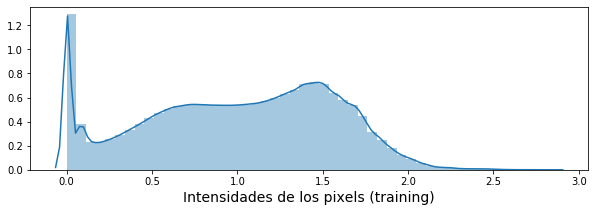

In [44]:
plt.figure(figsize=(10,3))
sns.distplot(imgs_tr_resized2.reshape(-1), bins=50, hist=True, kde=True)
plt.xlabel('Intensidades de los pixels (training)', fontsize=14);

In [46]:
from matplotlib.ticker import MaxNLocator

def grafica_entrenamiento(tr_acc=[], val_acc=[], tr_loss=[], val_loss=[], best_epoch=0,
                          figsize=(10,4)):
    plt.figure(figsize=figsize)
    if len(val_acc)>0:
        ax = plt.subplot(1,2,1)
        plt.plot(1+np.arange(len(tr_acc)),  100*np.array(tr_acc))
        plt.plot(1+np.arange(len(val_acc)), 100*np.array(val_acc))
        plt.plot(1+best_epoch, 100*val_acc[best_epoch], 'or')
        plt.title('tasa de acierto del modelo (%)', fontsize=18)
        plt.ylabel('tasa de acierto (%)', fontsize=18)
        plt.xlabel('época', fontsize=18)
        plt.legend(['entrenamiento', 'validación'], loc='upper left')
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax = plt.subplot(1,2,2)
    else:
        ax = plt.subplot(1,1,1)
    
    plt.plot(1+np.arange(len(tr_loss)), np.array(tr_loss))
    plt.plot(1+np.arange(len(val_loss)), np.array(val_loss))
    plt.plot(1+best_epoch, val_loss[best_epoch], 'or')
    plt.title('loss del modelo', fontsize=18)
    plt.ylabel('loss', fontsize=18)
    plt.xlabel('época', fontsize=18)
    plt.legend(['entrenamiento', 'validación'], loc='upper left')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

## Arquitectura del modelo

In [47]:
imgs_tr_resized2.shape

(665, 150, 150, 1)

In [48]:
input_shape = imgs_tr_resized2.shape[1:]

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))

model.add(Conv2D(filters=32,
                 kernel_size=(11,11),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,
                 kernel_size=(9,9),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,
                 kernel_size=(7,7),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,
                 kernel_size=(5,5),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten()) # capa de aplanamiento
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(l=0.01)
               ),
         )
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy',
#              optimizer='Adam',
              optimizer=optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])

W0911 09:54:42.490405 140370208610112 deprecation_wrapper.py:119] From /home/isua/anaconda3/envs/CAPRI/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0911 09:54:42.502135 140370208610112 deprecation_wrapper.py:119] From /home/isua/anaconda3/envs/CAPRI/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0911 09:54:42.516996 140370208610112 deprecation_wrapper.py:119] From /home/isua/anaconda3/envs/CAPRI/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0911 09:54:42.517569 140370208610112 deprecation_wrapper.py:119] From /home/isua/anaconda3/envs/CAPRI/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is dep

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 150, 150, 1)       4         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 140, 140, 32)      3904      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 70, 70, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 70, 70, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        82976     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 31, 31, 32)        128       
__________

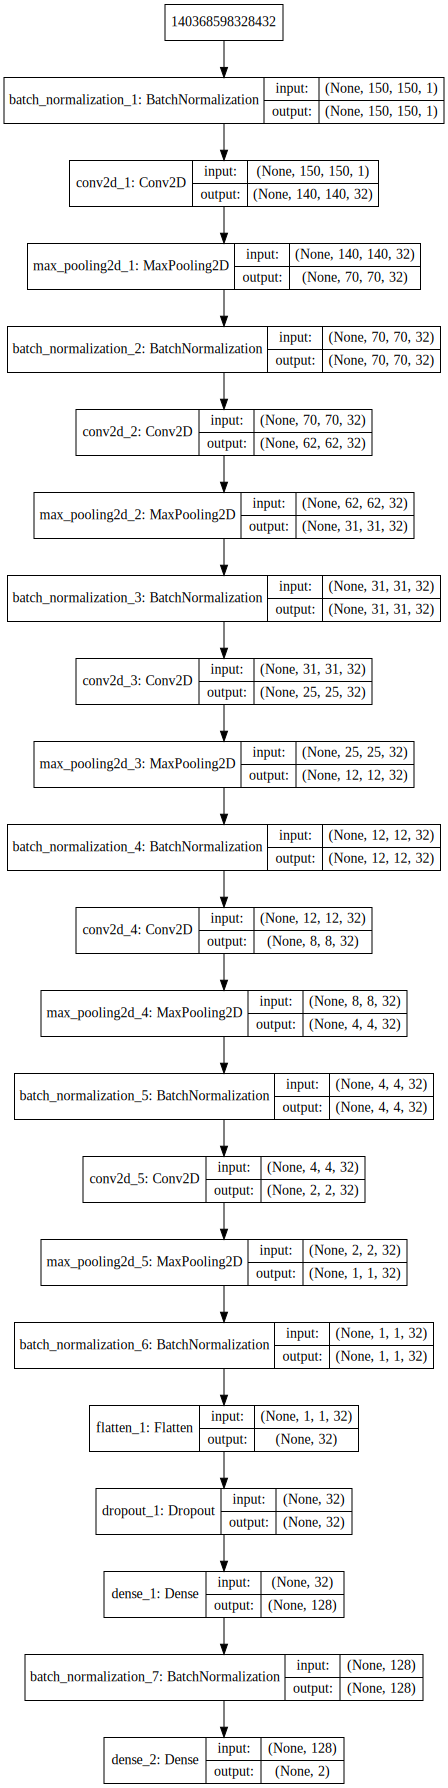

In [50]:
# graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

Como la red tiene dos neuronas de salida, el target tendrá que tener dos componentes. 

**Clase 0:** las componentes son [1, 0]. **Clase 1:** las componentes son [0, 1]:

In [51]:
y_tr2 = np.hstack((1-y_tr.reshape(-1,1), y_tr.reshape(-1,1)))
y_te2 = np.hstack((1-y_te.reshape(-1,1), y_te.reshape(-1,1)))
y_tr2.shape, y_te2.shape

((665, 2), (285, 2))

In [52]:
X_training, X_val, y_training, y_val = train_test_split(imgs_tr_resized2, y_tr2,
                                                        test_size=0.3, random_state=7)

In [53]:
print(y_training.shape)
print(y_val.shape)

(465, 2)
(200, 2)


In [54]:
from IPython.display import clear_output

In [55]:
acum_tr_acc   = []
acum_val_acc  = []
acum_tr_loss  = []
acum_val_loss = []
best_val_acc = -1e50
best_epoch = 0
epoca = 0

epochs = 550

In [56]:
batch_size = 32

train_generator = train_datagen.flow(X_training, y=y_training, batch_size=batch_size)

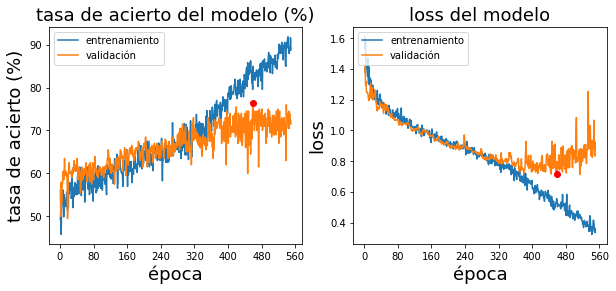

In [57]:
LOAD_MODEL = False

if not LOAD_MODEL:
    filepath="saved_models/manuel_version108.h5"
    
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1,
                                 save_best_only=True,
                                 mode='max') # graba sólo los que mejoran en validación
    callbacks_list = [checkpoint]
    
    for i in range(epochs):
        history = model.fit_generator(train_generator,
                                      steps_per_epoch=int(np.ceil(len(X_training)/batch_size)),
                                      epochs=1,
                                      callbacks=callbacks_list,
                                      verbose=1,
                                      validation_data=(X_val, y_val))
                
        acum_tr_acc.append(history.history['acc'][-1])
        acum_val_acc.append(history.history['val_acc'][-1])
        acum_tr_loss.append(history.history['loss'][-1])
        acum_val_loss.append(history.history['val_loss'][-1])
        
        if len(acum_tr_acc) > 1:
            if acum_val_acc[-1] > best_val_acc:
                best_epoch = epoca
                best_val_acc = acum_val_acc[-1]
            
            clear_output()
            grafica_entrenamiento(acum_tr_acc, acum_val_acc,
                                  acum_tr_loss, acum_val_loss, best_epoch)
        
        epoca = epoca + 1
            
else:
    filepath = "saved_models/manuel_version108.h5"

# Resultados obtenidos por el modelo CNN

In [58]:
model = load_model(filepath)

W0911 15:21:14.013087 140370208610112 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


In [59]:
score_tr = model.evaluate(X_training, y_training, verbose=0)
print('Train loss    :', score_tr[0])
print('Train accuracy:', score_tr[1])

score_val = model.evaluate(X_val, y_val, verbose=0)
print('Val loss    :', score_val[0])
print('Val accuracy:', score_val[1])

score_te = model.evaluate(imgs_te_resized2, y_te2, verbose=0)
print('Test loss     :', score_te[0])
print('Test accuracy :', score_te[1])

Train loss    : 0.4490482170094726
Train accuracy: 0.8580645162572142
Val loss    : 0.7168865859508514
Val accuracy: 0.765
Test loss     : 0.813151866929573
Test accuracy : 0.7157894707562631


In [60]:
def save_result(score_tr, score_val, score_te, version_name):
    
    keys = ["Train loss", "Train accuracy", "Val loss", "Val accuracy", "Test loss", "Test accuracy"]
    values = [score_tr[0], score_tr[1], score_val[0], score_val[1], score_te[0], score_te[1]]
    
    result_dict = {}
    for i in range(len(keys)):
        result_dict[keys[i]] = values[i]
        
    f = open("saved_result/"+version_name+".txt","w")
    f.write( str(result_dict) )
    f.close()

In [61]:
version_name="manuel_version108"
save_result(score_tr, score_val, score_te, version_name)


              precision    recall  f1-score   support

           0       0.70      0.90      0.78       164
           1       0.77      0.47      0.58       121

    accuracy                           0.72       285
   macro avg       0.73      0.68      0.68       285
weighted avg       0.73      0.72      0.70       285



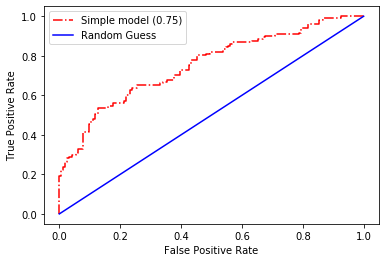

In [62]:
y_te_prob_pred = model.predict(imgs_te_resized2)
y_te_pred = 1*(y_te_prob_pred[:,1]>0.5)

report(y_te, y_te_pred, y_te_prob_pred[:,1])

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_te, y_te_pred)

array([[147,  17],
       [ 64,  57]])